# Performance across learning

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import *

#temp workaround since it gets removed from the path whenever the kernel is restarted
import sys
sys.path.insert(0, '/Users/gabriel/lib/')
import chiCa

%matplotlib widget

### Plot performance across days

In [ ]:
#Get the average performance across days for one animal
file_names = chiCa.pick_files_multi_session("chipmunk", "*.h5")
session_performance_averages = []

for file in file_names:
    session_data = pd.read_hdf(file)
    performance = np.array(session_data.outcome_record, dtype=float)
    performance[performance == -1] = np.nan #setting early withdrawal trials as nans
    performance[performance == 2] = np.nan #setting no response trials as nans
    session_performance_averages.append(np.nanmean(performance))

plt.close()
fig = plt.figure(1)
plt.plot(session_performance_averages, label='GRB001')
plt.xlabel('Sessions')
plt.ylabel('Session Performance')
plt.hlines(0.8, 0, len(session_performance_averages), color='k', linestyle='dotted')
fig.tight_layout()
plt.legend()
plt.show()

In [29]:
def get_performance_averages():
    file_names = chiCa.pick_files_multi_session("chipmunk", "*.h5")
    session_performance_averages = []
    for file in file_names:
        session_data = pd.read_hdf(file)
        performance = np.array(session_data.outcome_record, dtype=float)
        performance[performance == -1] = np.nan #setting early withdrawal trials as nans
        performance[performance == 2] = np.nan #setting no response trials as nans
        session_performance_averages.append(np.nanmean(performance))

    return session_performance_averages


GRB001_perf = get_performance_averages()
GRB002_perf = get_performance_averages()
GRB003_perf = get_performance_averages()
GRB004_perf = get_performance_averages()

data = {'GRB001':GRB001_perf, 'GRB002':GRB002_perf, 'GRB003':GRB003_perf, 'GRB004':GRB004_perf}

In [ ]:
fig, ax = plt.subplots()

for label, values in data.items():
    ax.plot(values, label=label)

ax.set_xlabel('Sessions')
ax.set_ylabel('Session Performance')
ax.hlines(0.8, 0, len(session_performance_averages), color='k', linestyle='dotted')
ax.legend()
# plt.show()

### Plotting performance across sessions on all trial types by sex

NameError: name 'session_performance_averages' is not defined

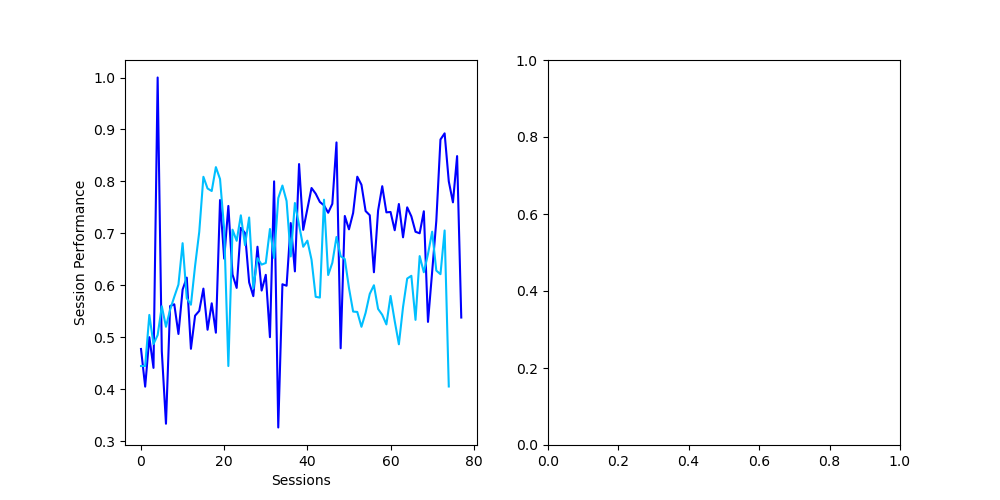

In [30]:
# Define the data for the subplots
males = {'GRB001':GRB001_perf, 'GRB002':GRB002_perf}
females = {'GRB003':GRB003_perf, 'GRB004':GRB004_perf}

# Define a list of blue colors for the males data
male_colors = ['b', 'deepskyblue']

# Define a list of red colors for the females data
female_colors = ['r', 'lightcoral']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the data on the first subplot
for i, (label, values) in enumerate(males.items()):
    ax1.plot(values, label=label, color=male_colors[i])
ax1.set_xlabel('Sessions')
ax1.set_ylabel('Session Performance')
ax1.hlines(0.8, 0, len(session_performance_averages), color='grey', linestyle='dotted')
ax1.legend()

# Plot the data on the second subplot
for i, (label, values) in enumerate(females.items()):
    ax2.plot(values, label=label, color=female_colors[i])
ax2.set_xlabel('Sessions')
ax2.set_ylabel('Session Performance')
ax2.hlines(0.8, 0, len(session_performance_averages), color='grey', linestyle='dotted')
ax2.legend()

# Set the title of the figure
fig.suptitle('Performance by Sex')

# Show the plot
plt.show()

### Plotting performance across sessions on easy trials only

In [ ]:
# stim_rates = np.array([len(timestamps) for timestamps in session_data.stimulus_event_timestamps])
# # stim_rates
# performance = np.array(session_data.outcome_record, dtype=float)
# performance[performance == -1] = np.nan #setting early withdrawal trials as nans
# performance[performance == 2] = np.nan #setting no response trials as nans
# performance[(stim_rates != 4) & (stim_rates != 20)] = np.nan #setting non easy trials (4 and 20 Hz) to nan
# performance


def get_performance_averages():
    file_names = chiCa.pick_files_multi_session("chipmunk", "*.h5")
    session_performance_averages = []
    for file in file_names:
        session_data = pd.read_hdf(file)
        stim_rates = np.array([len(timestamps) for timestamps in session_data.stimulus_event_timestamps])
        performance = np.array(session_data.outcome_record, dtype=float)
        performance[performance == -1] = np.nan #setting early withdrawal trials as nans
        performance[performance == 2] = np.nan #setting no response trials as nans
        performance[(stim_rates != 4) & (stim_rates != 20)] = np.nan #setting non easy trials (4 and 20 Hz) to nan
        session_performance_averages.append(np.nanmean(performance))

    return session_performance_averages


GRB001_perf = get_performance_averages()
GRB002_perf = get_performance_averages()
GRB003_perf = get_performance_averages()
GRB004_perf = get_performance_averages()

data = {'GRB001':GRB001_perf, 'GRB002':GRB002_perf, 'GRB003':GRB003_perf, 'GRB004':GRB004_perf}

# Define the data for the subplots
males = {'GRB001':GRB001_perf, 'GRB002':GRB002_perf}
females = {'GRB003':GRB003_perf, 'GRB004':GRB004_perf}

male_colors = ['b', 'deepskyblue']
female_colors = ['r', 'lightcoral']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

#males plot
for i, (label, values) in enumerate(males.items()):
    ax1.plot(values, label=label, color=male_colors[i])
ax1.set_xlabel('Sessions')
ax1.set_ylabel('Session Performance')
ax1.hlines(0.8, 0, len(session_performance_averages), color='grey', linestyle='dotted')
ax1.legend()

#females plot
for i, (label, values) in enumerate(females.items()):
    ax2.plot(values, label=label, color=female_colors[i])
ax2.set_xlabel('Sessions')
ax2.set_ylabel('Session Performance')
ax2.hlines(0.8, 0, len(session_performance_averages), color='grey', linestyle='dotted')
ax2.legend()

fig.suptitle('Performance by Sex')
plt.show()


### Plot the same thing as above but averaging animals and plotting the SEM

/var/folders/k4/_l1cqd4d0gn02n75d0rrj10h0000gr/T/ipykernel_66627/77125595.py:16: RuntimeWarning: Mean of empty slice
  female_means = np.nanmean([values for label, values in females.items()], axis=0)
/Users/gabriel/miniconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


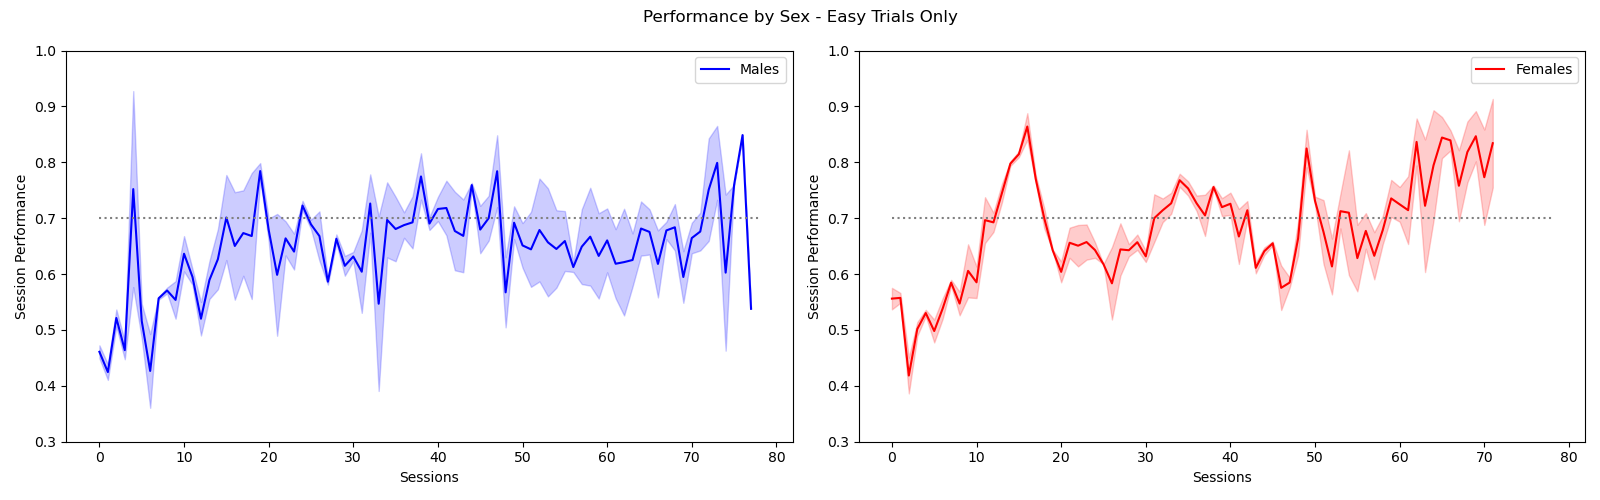

In [31]:
males = {'GRB001':GRB001_perf, 'GRB002':GRB002_perf}
females = {'GRB003':GRB003_perf, 'GRB004':GRB004_perf}

# Get the length of the longest data series
max_len = max([len(values) for label, values in males.items()] + [len(values) for label, values in females.items()])

# Pad the data series with NaN values to ensure they all have the same length
for label, values in males.items():
    males[label] = np.pad(values, (0, max_len - len(values)), mode='constant', constant_values=np.nan)
for label, values in females.items():
    females[label] = np.pad(values, (0, max_len - len(values)), mode='constant', constant_values=np.nan)

# Calculate the mean and SEM for each data series at every timepoint
male_means = np.nanmean([values for label, values in males.items()], axis=0)
male_sems = np.nanstd([values for label, values in males.items()], axis=0) / np.sqrt(np.count_nonzero(~np.isnan([values for label, values in males.items()]), axis=0))
female_means = np.nanmean([values for label, values in females.items()], axis=0)
female_sems = np.nanstd([values for label, values in females.items()], axis=0) / np.sqrt(np.count_nonzero(~np.isnan([values for label, values in females.items()]), axis=0))

male_color = 'b'
female_color = 'r'

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

#males plot
ax1.plot(male_means, label='Males', color=male_color)
ax1.fill_between(range(len(male_means)), male_means - male_sems, male_means + male_sems, alpha=0.2, color=male_color)
ax1.set_xlabel('Sessions')
ax1.set_ylabel('Session Performance')
ax1.set_ylim([0.3, 1])
ax1.hlines(0.7, 0, len(male_means), color='grey', linestyle='dotted')
ax1.legend()

#females plot
ax2.plot(female_means, label='Females', color=female_color)
ax2.fill_between(range(len(female_means)), female_means - female_sems, female_means + female_sems, alpha=0.2, color=female_color)
ax2.set_xlabel('Sessions')
ax2.set_ylabel('Session Performance')
ax2.set_ylim([0.3, 1])
ax2.hlines(0.7, 0, len(female_means), color='grey', linestyle='dotted')
ax2.legend()

fig.suptitle('Performance by Sex - Easy Trials Only')
fig.tight_layout()
plt.show()
plt.savefig("performance-by-sex-across-learning.pdf", dpi=300)

# PMF Fitting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils import *
from fit_psychometric import PsychometricRegression, fit_psychometric, cumulative_gaussian, weibull

#temp workaround since it gets removed from the path whenever the kernel is restarted
import sys
sys.path.insert(0, '/Users/gabriel/lib/')
import chiCa

%matplotlib widget

### Plot PMF

<class 'statsmodels.iolib.summary.Summary'>
"""
                          PsychometricRegression Results                          
==================================================================================
Dep. Variable:                          y   Log-Likelihood:                -156.80
Model:             PsychometricRegression   AIC:                             321.6
Method:                Maximum Likelihood   BIC:                             336.1
Date:                    Sun, 08 Oct 2023                                         
Time:                            15:27:05                                         
No. Observations:                     275                                         
Df Residuals:                         271                                         
Df Model:                               0                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
bias           11.3298      3.232      3.506      0.000       4.996      17.664
sensitivity     0.1607      0.189      0.848      0.396      -0.211       0.532
gamma1          0.2281      0.396      0.576      0.564      -0.548       1.004
gamma2          0.0328      0.240      0.137      0.891      -0.438       0.504
===============================================================================
"""

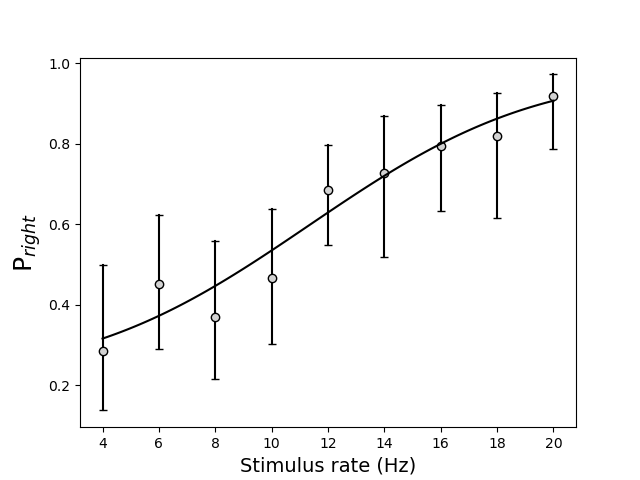

In [9]:
file = chiCa.pick_files_multi_session("chipmunk", "*.h5")
session_data = pd.read_hdf(file[0])

sel = session_data[session_data.response_side.isin([0,1])] # select only trials where the subject responded
responded_right = np.array(sel.response_side == 1).astype(int) # select the response = 1 (i.e. the left side) and cast to integer datatype (number)   
sel_stim_rates = np.array([len(timestamps) for timestamps in sel.stimulus_event_timestamps])

res = fit_psychometric(sel_stim_rates.astype(float),responded_right.astype(float))

# now plot
plt.figure()
for s,c in zip(res['stims'],res['p_side_ci']):
    plt.plot(s*np.array([1,1]),c,'k-_')
plt.plot(res['stims'],res['p_side'],'ko',markerfacecolor = 'lightgray',markersize = 6)

nx = np.linspace(res['stims'].min(),res['stims'].max(),100)
plt.plot(nx,res['function'](*res['fit_params'],nx),'k')
plt.ylabel('P$_{right}$',fontsize = 18)  # set the y-axis label with latex nomenclature
plt.xlabel('Stimulus rate (Hz)', fontsize = 14); # set the x-axis label
res['fit'].summary()

/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


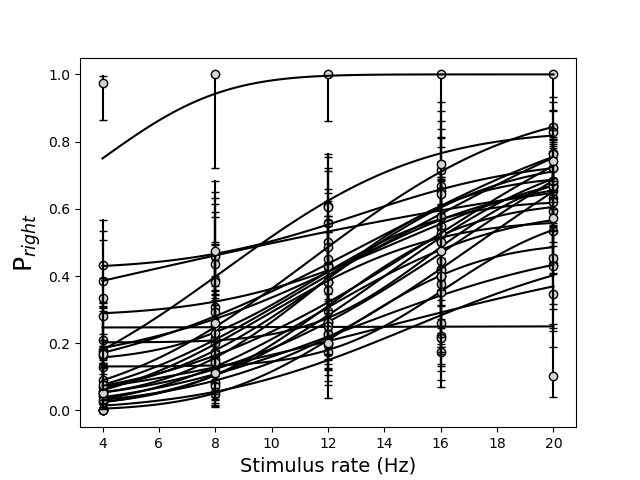

In [14]:
def plot_pmf_fit(min_stims=5):
    file_names = chiCa.pick_files_multi_session("chipmunk", "*.h5")
    for file in file_names:
        session_data = pd.read_hdf(file)
        sel = session_data[session_data.response_side.isin([0,1])] # select only trials where the subject responded
        responded_right = np.array(sel.response_side == 1).astype(int) # select the response = 1 (i.e. the left side) and cast to integer datatype (number)   
        sel_stim_rates = np.array([len(timestamps) for timestamps in sel.stimulus_event_timestamps])

        if len(np.unique(sel_stim_rates))==min_stims:
            try:
                res = fit_psychometric(sel_stim_rates.astype(float),responded_right.astype(float), min_required_stim_values=min_stims)

                # now plot
                for s,c in zip(res['stims'],res['p_side_ci']):
                    plt.plot(s*np.array([1,1]),c,'k-_')
                plt.plot(res['stims'],res['p_side'],'ko',markerfacecolor = 'lightgray',markersize = 6)

                nx = np.linspace(res['stims'].min(),res['stims'].max(),100)
                plt.plot(nx,res['function'](*res['fit_params'],nx),'k')
                plt.ylabel('P$_{right}$',fontsize = 18)  # set the y-axis label with latex nomenclature
                plt.xlabel('Stimulus rate (Hz)', fontsize = 14); # set the x-axis label
            except:
                continue

    plt.show()
    
    return None

plt.close()
plot_pmf_fit()

### Plot fits across sessions given a stimulus frequency condition

In [12]:
def plot_pmf_fit(min_stims=5, stims_equal=False, show_plot=False):
    import matplotlib.cm as cm
    file_names = chiCa.pick_files_multi_session("chipmunk", "*.h5")
    count=0
    for file in file_names:
        session_data = pd.read_hdf(file)
        sel = session_data[session_data.response_side.isin([0,1])] # select only trials where the subject responded
        responded_right = np.array(sel.response_side == 1).astype(int) # select the response = 1 (i.e. the left side) and cast to integer datatype (number)   
        sel_stim_rates = np.array([len(timestamps) for timestamps in sel.stimulus_event_timestamps])
        if stims_equal:
            if len(np.unique(sel_stim_rates))==min_stims:
                count+=1
        else:
            if len(np.unique(sel_stim_rates))>=min_stims:
                count+=1

    colors = cm.plasma(np.linspace(0, 1, count)) # get a sequential colormap

    fig, ax = plt.subplots()
    color_count = 0
    for i, file in enumerate(file_names):
        session_data = pd.read_hdf(file)
        sel = session_data[session_data.response_side.isin([0,1])] # select only trials where the subject responded
        responded_right = np.array(sel.response_side == 1).astype(int) # select the response = 1 (i.e. the left side) and cast to integer datatype (number)   
        sel_stim_rates = np.array([len(timestamps) for timestamps in sel.stimulus_event_timestamps])

        if stims_equal:
            if len(np.unique(sel_stim_rates))==min_stims:
                try:
                    res = fit_psychometric(sel_stim_rates.astype(float),responded_right.astype(float), min_required_stim_values=min_stims)

                    # now plot
                    for s,c in zip(res['stims'],res['p_side_ci']):
                        ax.plot(s*np.array([1,1]),c,color=colors[color_count], linestyle='-', linewidth=2)
                    ax.plot(res['stims'],res['p_side'],'o',markerfacecolor = 'lightgray',markersize = 6, color=colors[color_count])

                    nx = np.linspace(res['stims'].min(),res['stims'].max(),100)
                    ax.plot(nx,res['function'](*res['fit_params'],nx),color=colors[color_count], linewidth=2)
                    ax.set_ylabel('P$_{right}$',fontsize = 18)  # set the y-axis label with latex nomenclature
                    ax.set_xlabel('Stimulus rate (Hz)', fontsize = 14); # set the x-axis label
                    color_count += 1
                except:
                    continue
        else:
            if len(np.unique(sel_stim_rates))>=min_stims:
                try:
                    res = fit_psychometric(sel_stim_rates.astype(float),responded_right.astype(float), min_required_stim_values=min_stims)

                    # now plot
                    for s,c in zip(res['stims'],res['p_side_ci']):
                        ax.plot(s*np.array([1,1]),c,color=colors[color_count], linestyle='-', linewidth=2)
                    ax.plot(res['stims'],res['p_side'],'o',markerfacecolor = 'lightgray',markersize = 6, color=colors[color_count])

                    nx = np.linspace(res['stims'].min(),res['stims'].max(),100)
                    ax.plot(nx,res['function'](*res['fit_params'],nx),color=colors[color_count], linewidth=2)
                    ax.set_ylabel('P$_{right}$',fontsize = 18)  # set the y-axis label with latex nomenclature
                    ax.set_xlabel('Stimulus rate (Hz)', fontsize = 14); # set the x-axis label
                    color_count += 1
                except:
                    continue

    # add colorbar
    sm = plt.cm.ScalarMappable(cmap=cm.plasma, norm=plt.Normalize(vmin=0, vmax=count-1))
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Sessions', rotation=270, labelpad=20)

    if show_plot:
        plt.show()
    
    return None

# plt.close()
# plot_pmf_fit(min_stims=2, stims_equal=True, show_plot=True)

### Plotting the above for all 4 animals at once

/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmode

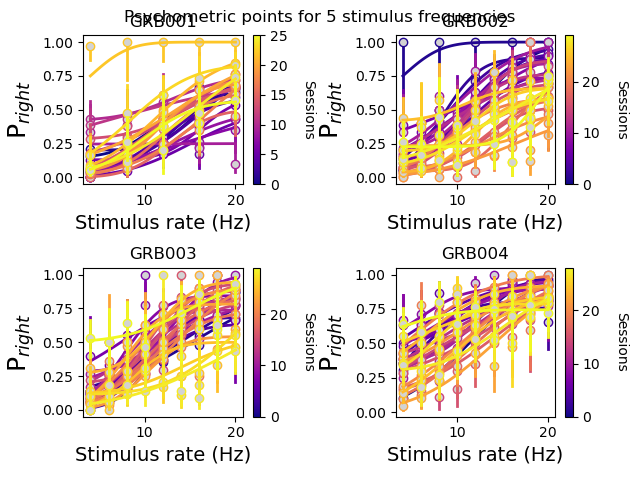

In [21]:
def plot_pmf_fit_grid(ax, min_stims=5, stims_equal=False, show_plot=False):
    import matplotlib.cm as cm
    file_names = chiCa.pick_files_multi_session("chipmunk", "*.h5")
    count=0
    for file in file_names:
        session_data = pd.read_hdf(file)
        sel = session_data[session_data.response_side.isin([0,1])] # select only trials where the subject responded
        responded_right = np.array(sel.response_side == 1).astype(int) # select the response = 1 (i.e. the left side) and cast to integer datatype (number)   
        sel_stim_rates = np.array([len(timestamps) for timestamps in sel.stimulus_event_timestamps])
        if stims_equal:
            if len(np.unique(sel_stim_rates))==min_stims:
                count+=1
        else:
            if len(np.unique(sel_stim_rates))>=min_stims:
                count+=1

    colors = cm.plasma(np.linspace(0, 1, count)) # get a sequential colormap

    xticks = dict({2:[4,20], 4:[4,8,16,20], 5:[4,8,12,16,20], 9:[4,6,8,10,12,14,16,18,20]})

    color_count = 0
    for i, file in enumerate(file_names):
        session_data = pd.read_hdf(file)
        sel = session_data[session_data.response_side.isin([0,1])] # select only trials where the subject responded
        responded_right = np.array(sel.response_side == 1).astype(int) # select the response = 1 (i.e. the left side) and cast to integer datatype (number)   
        sel_stim_rates = np.array([len(timestamps) for timestamps in sel.stimulus_event_timestamps])

        if stims_equal:
            if len(np.unique(sel_stim_rates))==min_stims:
                try:
                    res = fit_psychometric(sel_stim_rates.astype(float),responded_right.astype(float), min_required_stim_values=min_stims)

                    # now plot
                    for s,c in zip(res['stims'],res['p_side_ci']):
                        ax.plot(s*np.array([1,1]),c,color=colors[color_count], linestyle='-', linewidth=2)
                    ax.plot(res['stims'],res['p_side'],'o',markerfacecolor = 'lightgray',markersize = 6, color=colors[color_count])

                    nx = np.linspace(res['stims'].min(),res['stims'].max(),100)
                    ax.plot(nx,res['function'](*res['fit_params'],nx),color=colors[color_count], linewidth=2)
                    ax.set_ylabel('P$_{right}$',fontsize = 18)  # set the y-axis label with latex nomenclature
                    ax.set_xlabel('Stimulus rate (Hz)', fontsize = 14); # set the x-axis label
                    ax.set_xticks(xticks[min_stims])
                    color_count += 1
                except:
                    continue
        else:
            if len(np.unique(sel_stim_rates))>=min_stims:
                try:
                    res = fit_psychometric(sel_stim_rates.astype(float),responded_right.astype(float), min_required_stim_values=min_stims)

                    # now plot
                    for s,c in zip(res['stims'],res['p_side_ci']):
                        ax.plot(s*np.array([1,1]),c,color=colors[color_count], linestyle='-', linewidth=2)
                    ax.plot(res['stims'],res['p_side'],'o',markerfacecolor = 'lightgray',markersize = 6, color=colors[color_count])

                    nx = np.linspace(res['stims'].min(),res['stims'].max(),100)
                    ax.plot(nx,res['function'](*res['fit_params'],nx),color=colors[color_count], linewidth=2)
                    ax.set_ylabel('P$_{right}$',fontsize = 18)  # set the y-axis label with latex nomenclature
                    ax.set_xlabel('Stimulus rate (Hz)', fontsize = 14); # set the x-axis label
                    color_count += 1
                    ax.set_xticks(xticks[8])
                except:
                    continue

    # add colorbar
    sm = plt.cm.ScalarMappable(cmap=cm.plasma, norm=plt.Normalize(vmin=0, vmax=count-1))
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Sessions', rotation=270, labelpad=20)

    if show_plot:
        plt.show()
    
    return None

def plot_PMF_four_animals(minstims, stimsequal):
    fig, axs = plt.subplots(2, 2)

    for i, ax in enumerate(axs.flatten()):
        plot_pmf_fit_grid(ax, min_stims=minstims, stims_equal=stimsequal)
        ax.set_title(f"GRB00{i+1}")

    fig.tight_layout()

    plt.show()

plt.close()
plot_PMF_four_animals(minstims=5, stimsequal=False)

### Getting PMF paramters (bias, sensitivity, left lapse, right lapse)

In [3]:
def get_pmf_parameters():
    file_names = chiCa.pick_files_multi_session("chipmunk", "*.h5")
    bias = []
    sensitivity = []
    left_lapse = []
    right_lapse = []
    for file in file_names:
        session_data = pd.read_hdf(file)
        sel = session_data[session_data.response_side.isin([0,1])] # select only trials where the subject responded
        responded_right = np.array(sel.response_side == 1).astype(int) # select the response = 1 (i.e. the left side) and cast to integer datatype (number)   
        sel_stim_rates = np.array([len(timestamps) for timestamps in sel.stimulus_event_timestamps])


        res = fit_psychometric(sel_stim_rates.astype(float),responded_right.astype(float), min_required_stim_values=5)

        try:
            bias.append(res['fit_params'][0])
            sensitivity.append(res['fit_params'][1])
            left_lapse.append(res['fit_params'][2])
            right_lapse.append(res['fit_params'][3])
        except:
            bias.append(np.nan)
            sensitivity.append(np.nan)
            left_lapse.append(np.nan)
            right_lapse.append(np.nan)

    return bias, sensitivity, left_lapse, right_lapse

GRB001_pmf_parameters = get_pmf_parameters()
GRB002_pmf_parameters = get_pmf_parameters()
GRB003_pmf_parameters = get_pmf_parameters()
GRB004_pmf_parameters = get_pmf_parameters()

GRB001_params = dict({'bias':GRB001_pmf_parameters[0], 'sensitivity':GRB001_pmf_parameters[1], 'left_lapse':GRB001_pmf_parameters[2], 'right_lapse':GRB001_pmf_parameters[3]})
GRB002_params = dict({'bias':GRB002_pmf_parameters[0], 'sensitivity':GRB002_pmf_parameters[1], 'left_lapse':GRB002_pmf_parameters[2], 'right_lapse':GRB002_pmf_parameters[3]})
GRB003_params = dict({'bias':GRB003_pmf_parameters[0], 'sensitivity':GRB003_pmf_parameters[1], 'left_lapse':GRB003_pmf_parameters[2], 'right_lapse':GRB003_pmf_parameters[3]})
GRB004_params = dict({'bias':GRB004_pmf_parameters[0], 'sensitivity':GRB004_pmf_parameters[1], 'left_lapse':GRB004_pmf_parameters[2], 'right_lapse':GRB004_pmf_parameters[3]})

/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/gabriel/miniconda3/lib/python3.10/site-packages/statsmode

### Parameters lineplot

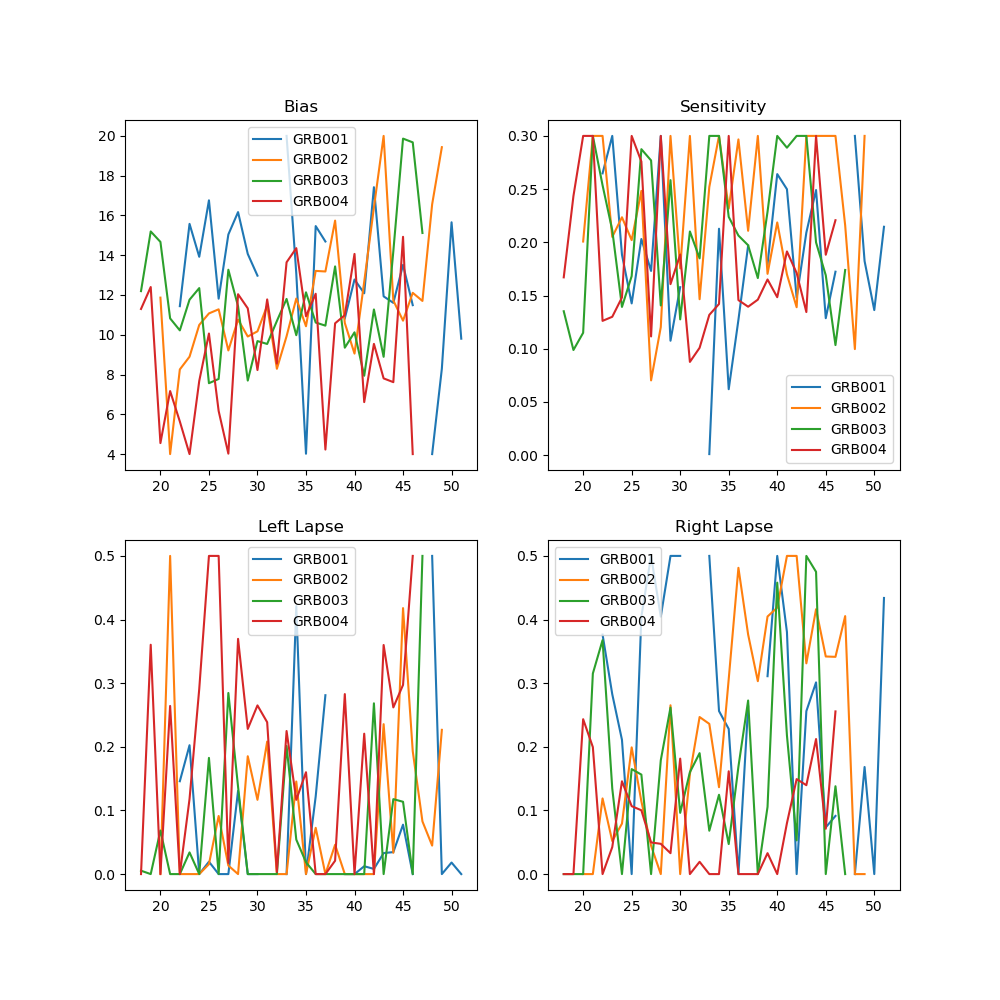

In [49]:
plt.close()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot bias
bias_GRB001 = np.array(GRB001_params['bias'])
bias_GRB002 = np.array(GRB002_params['bias'])
bias_GRB003 = np.array(GRB003_params['bias'])
bias_GRB004 = np.array(GRB004_params['bias'])

max_length = max(len(bias_GRB001), len(bias_GRB002), len(bias_GRB003), len(bias_GRB004))

bias_GRB001 = np.pad(bias_GRB001, (0, max_length - len(bias_GRB001)), mode='constant', constant_values=np.nan)
bias_GRB002 = np.pad(bias_GRB002, (0, max_length - len(bias_GRB002)), mode='constant', constant_values=np.nan)
bias_GRB003 = np.pad(bias_GRB003, (0, max_length - len(bias_GRB003)), mode='constant', constant_values=np.nan)
bias_GRB004 = np.pad(bias_GRB004, (0, max_length - len(bias_GRB004)), mode='constant', constant_values=np.nan)

bias = np.array([bias_GRB001, bias_GRB002, bias_GRB003, bias_GRB004])
labels = ['GRB001', 'GRB002', 'GRB003', 'GRB004']

axs[0, 0].plot(bias.T, label=labels)
axs[0, 0].set_title('Bias')
axs[0, 0].legend()

# Plot sensitivity
sensitivity_GRB001 = np.array(GRB001_params['sensitivity'])
sensitivity_GRB002 = np.array(GRB002_params['sensitivity'])
sensitivity_GRB003 = np.array(GRB003_params['sensitivity'])
sensitivity_GRB004 = np.array(GRB004_params['sensitivity'])

max_length = max(len(sensitivity_GRB001), len(sensitivity_GRB002), len(sensitivity_GRB003), len(sensitivity_GRB004))

sensitivity_GRB001 = np.pad(sensitivity_GRB001, (0, max_length - len(sensitivity_GRB001)), mode='constant', constant_values=np.nan)
sensitivity_GRB002 = np.pad(sensitivity_GRB002, (0, max_length - len(sensitivity_GRB002)), mode='constant', constant_values=np.nan)
sensitivity_GRB003 = np.pad(sensitivity_GRB003, (0, max_length - len(sensitivity_GRB003)), mode='constant', constant_values=np.nan)
sensitivity_GRB004 = np.pad(sensitivity_GRB004, (0, max_length - len(sensitivity_GRB004)), mode='constant', constant_values=np.nan)

sensitivity = np.array([sensitivity_GRB001, sensitivity_GRB002, sensitivity_GRB003, sensitivity_GRB004])
labels = ['GRB001', 'GRB002', 'GRB003', 'GRB004']

axs[0, 1].plot(sensitivity.T, label=labels)
axs[0, 1].set_title('Sensitivity')
axs[0, 1].legend()

# Plot left lapse
left_lapse_GRB001 = np.array(GRB001_params['left_lapse'])
left_lapse_GRB002 = np.array(GRB002_params['left_lapse'])
left_lapse_GRB003 = np.array(GRB003_params['left_lapse'])
left_lapse_GRB004 = np.array(GRB004_params['left_lapse'])

max_length = max(len(left_lapse_GRB001), len(left_lapse_GRB002), len(left_lapse_GRB003), len(left_lapse_GRB004))

left_lapse_GRB001 = np.pad(left_lapse_GRB001, (0, max_length - len(left_lapse_GRB001)), mode='constant', constant_values=np.nan)
left_lapse_GRB002 = np.pad(left_lapse_GRB002, (0, max_length - len(left_lapse_GRB002)), mode='constant', constant_values=np.nan)
left_lapse_GRB003 = np.pad(left_lapse_GRB003, (0, max_length - len(left_lapse_GRB003)), mode='constant', constant_values=np.nan)
left_lapse_GRB004 = np.pad(left_lapse_GRB004, (0, max_length - len(left_lapse_GRB004)), mode='constant', constant_values=np.nan)

left_lapse = np.array([left_lapse_GRB001, left_lapse_GRB002, left_lapse_GRB003, left_lapse_GRB004])
labels = ['GRB001', 'GRB002', 'GRB003', 'GRB004']

axs[1, 0].plot(left_lapse.T, label=labels)
axs[1, 0].set_title('Left Lapse')
axs[1, 0].legend()

# Plot right lapse
right_lapse_GRB001 = np.array(GRB001_params['right_lapse'])
right_lapse_GRB002 = np.array(GRB002_params['right_lapse'])
right_lapse_GRB003 = np.array(GRB003_params['right_lapse'])
right_lapse_GRB004 = np.array(GRB004_params['right_lapse'])

max_length = max(len(right_lapse_GRB001), len(right_lapse_GRB002), len(right_lapse_GRB003), len(right_lapse_GRB004))

right_lapse_GRB001 = np.pad(right_lapse_GRB001, (0, max_length - len(right_lapse_GRB001)), mode='constant', constant_values=np.nan)
right_lapse_GRB002 = np.pad(right_lapse_GRB002, (0, max_length - len(right_lapse_GRB002)), mode='constant', constant_values=np.nan)
right_lapse_GRB003 = np.pad(right_lapse_GRB003, (0, max_length - len(right_lapse_GRB003)), mode='constant', constant_values=np.nan)
right_lapse_GRB004 = np.pad(right_lapse_GRB004, (0, max_length - len(right_lapse_GRB004)), mode='constant', constant_values=np.nan)

right_lapse = np.array([right_lapse_GRB001, right_lapse_GRB002, right_lapse_GRB003, right_lapse_GRB004])
labels = ['GRB001', 'GRB002', 'GRB003', 'GRB004']

axs[1, 1].plot(right_lapse.T, label=labels)
axs[1, 1].set_title('Right Lapse')
axs[1, 1].legend()

plt.show()

### Parameters boxplot with matplotlib

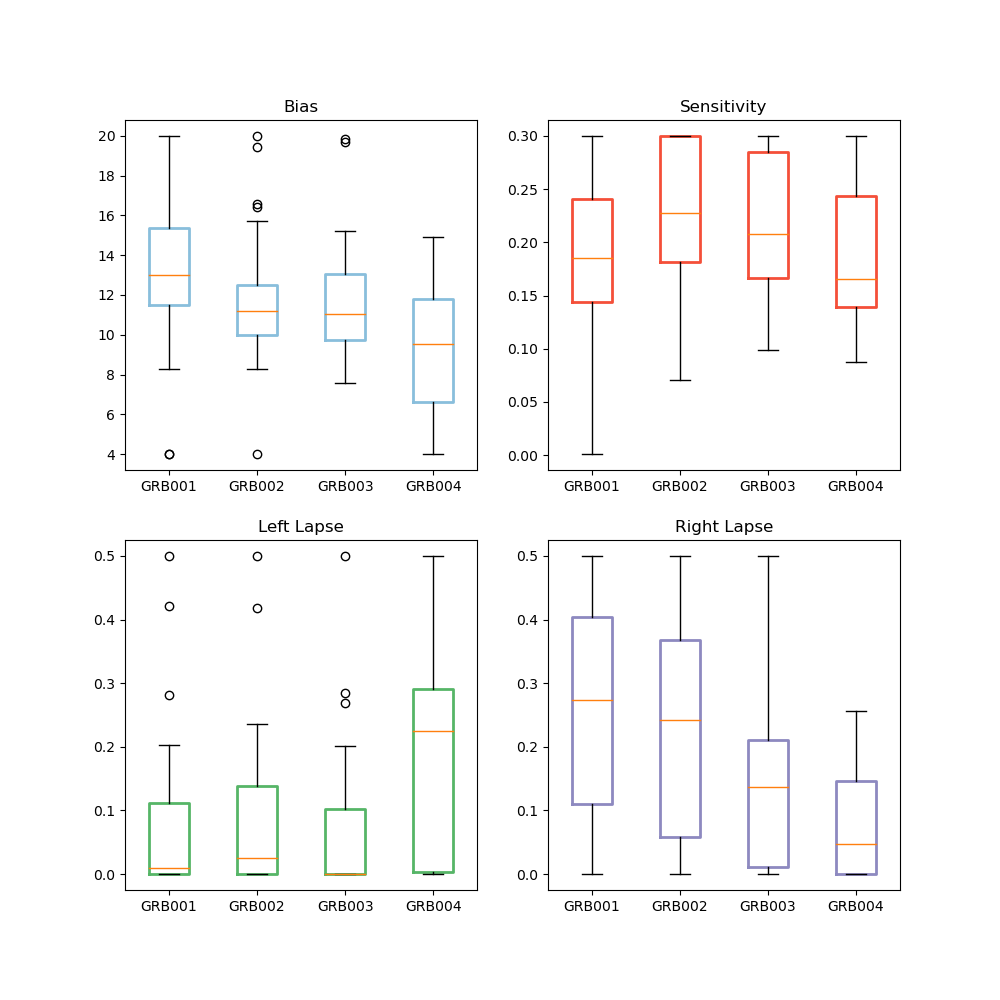

In [50]:
import seaborn as sns

plt.close()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot bias
bias_GRB001 = np.array(GRB001_params['bias'])
bias_GRB002 = np.array(GRB002_params['bias'])
bias_GRB003 = np.array(GRB003_params['bias'])
bias_GRB004 = np.array(GRB004_params['bias'])

bias_data = [bias_GRB001[~np.isnan(bias_GRB001)],
             bias_GRB002[~np.isnan(bias_GRB002)],
             bias_GRB003[~np.isnan(bias_GRB003)],
             bias_GRB004[~np.isnan(bias_GRB004)]]

boxprops = dict(linestyle='-', linewidth=2)
boxprops['color'] = sns.color_palette('Blues')[2]
axs[0, 0].boxplot(bias_data, boxprops=boxprops)
axs[0, 0].set_title('Bias')
axs[0, 0].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

# Plot sensitivity
sensitivity_GRB001 = np.array(GRB001_params['sensitivity'])
sensitivity_GRB002 = np.array(GRB002_params['sensitivity'])
sensitivity_GRB003 = np.array(GRB003_params['sensitivity'])
sensitivity_GRB004 = np.array(GRB004_params['sensitivity'])

sensitivity_data = [sensitivity_GRB001[~np.isnan(sensitivity_GRB001)],
                    sensitivity_GRB002[~np.isnan(sensitivity_GRB002)],
                    sensitivity_GRB003[~np.isnan(sensitivity_GRB003)],
                    sensitivity_GRB004[~np.isnan(sensitivity_GRB004)]]

boxprops = dict(linestyle='-', linewidth=2, color=sns.color_palette('Reds')[3])
axs[0, 1].boxplot(sensitivity_data, boxprops=boxprops)
axs[0, 1].set_title('Sensitivity')
axs[0, 1].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

# Plot left lapse
left_lapse_GRB001 = np.array(GRB001_params['left_lapse'])
left_lapse_GRB002 = np.array(GRB002_params['left_lapse'])
left_lapse_GRB003 = np.array(GRB003_params['left_lapse'])
left_lapse_GRB004 = np.array(GRB004_params['left_lapse'])

left_lapse_data = [left_lapse_GRB001[~np.isnan(left_lapse_GRB001)],
                   left_lapse_GRB002[~np.isnan(left_lapse_GRB002)],
                   left_lapse_GRB003[~np.isnan(left_lapse_GRB003)],
                   left_lapse_GRB004[~np.isnan(left_lapse_GRB004)]]

boxprops = dict(linestyle='-', linewidth=2, color=sns.color_palette('Greens')[3])
axs[1, 0].boxplot(left_lapse_data, boxprops=boxprops)
axs[1, 0].set_title('Left Lapse')
axs[1, 0].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

# Plot right lapse
right_lapse_GRB001 = np.array(GRB001_params['right_lapse'])
right_lapse_GRB002 = np.array(GRB002_params['right_lapse'])
right_lapse_GRB003 = np.array(GRB003_params['right_lapse'])
right_lapse_GRB004 = np.array(GRB004_params['right_lapse'])

right_lapse_data = [right_lapse_GRB001[~np.isnan(right_lapse_GRB001)],
                    right_lapse_GRB002[~np.isnan(right_lapse_GRB002)],
                    right_lapse_GRB003[~np.isnan(right_lapse_GRB003)],
                    right_lapse_GRB004[~np.isnan(right_lapse_GRB004)]]

boxprops = dict(linestyle='-', linewidth=2, color=sns.color_palette('Purples')[3])
axs[1, 1].boxplot(right_lapse_data, boxprops=boxprops)
axs[1, 1].set_title('Right Lapse')
axs[1, 1].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

plt.show()

### Parameters boxplot with seaborn

/Users/gabriel/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:grey'` for same effect.
  warnings.warn(msg, FutureWarning)
/Users/gabriel/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:grey'` for same effect.
  warnings.warn(msg, FutureWarning)
/Users/gabriel/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:grey'` for same effect.
  warnings.warn(msg, FutureWarning)
/Users/gabriel/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `pa

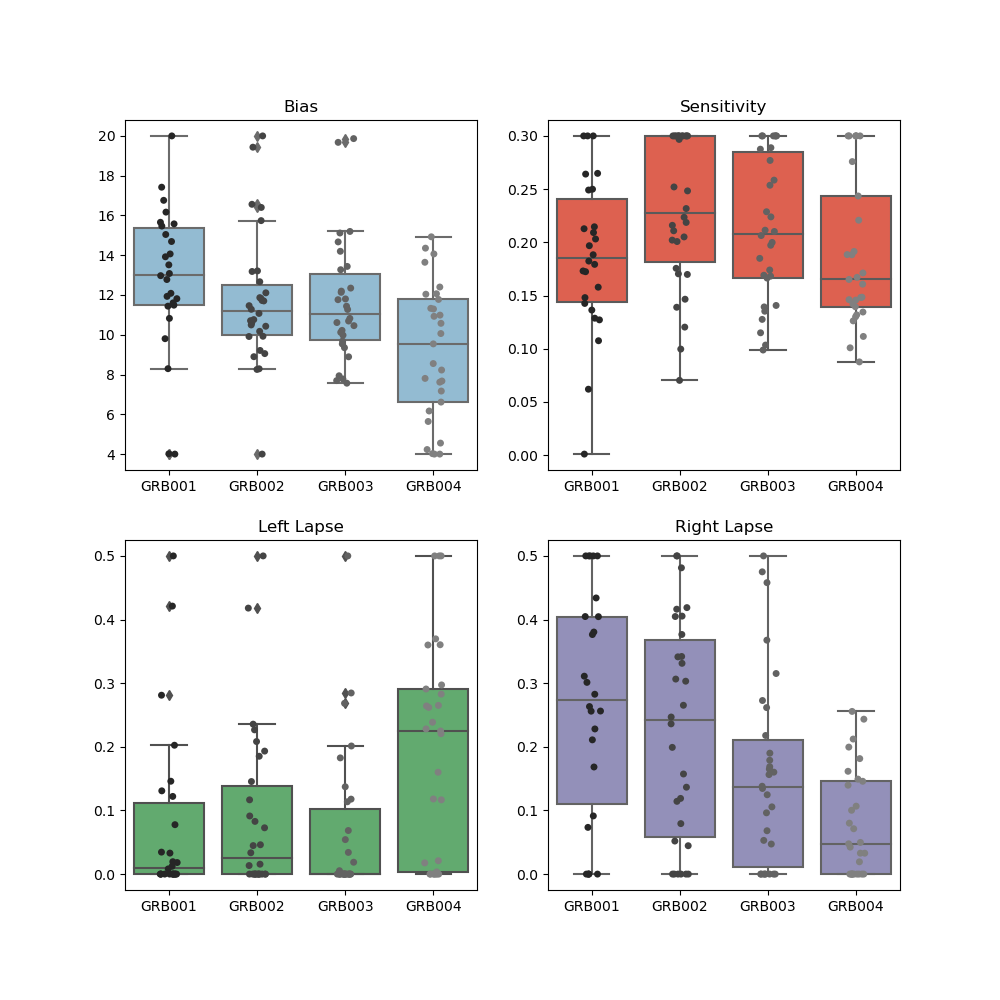

In [51]:
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot bias
bias_GRB001 = np.array(GRB001_params['bias'])
bias_GRB002 = np.array(GRB002_params['bias'])
bias_GRB003 = np.array(GRB003_params['bias'])
bias_GRB004 = np.array(GRB004_params['bias'])

bias_data = [bias_GRB001[~np.isnan(bias_GRB001)],
             bias_GRB002[~np.isnan(bias_GRB002)],
             bias_GRB003[~np.isnan(bias_GRB003)],
             bias_GRB004[~np.isnan(bias_GRB004)]]

sns.boxplot(ax=axs[0, 0], data=bias_data, color=sns.color_palette('Blues')[2])
sns.stripplot(ax=axs[0, 0], data=bias_data, color='grey')
axs[0, 0].set_title('Bias')
axs[0, 0].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

# Plot sensitivity
sensitivity_GRB001 = np.array(GRB001_params['sensitivity'])
sensitivity_GRB002 = np.array(GRB002_params['sensitivity'])
sensitivity_GRB003 = np.array(GRB003_params['sensitivity'])
sensitivity_GRB004 = np.array(GRB004_params['sensitivity'])

sensitivity_data = [sensitivity_GRB001[~np.isnan(sensitivity_GRB001)],
                    sensitivity_GRB002[~np.isnan(sensitivity_GRB002)],
                    sensitivity_GRB003[~np.isnan(sensitivity_GRB003)],
                    sensitivity_GRB004[~np.isnan(sensitivity_GRB004)]]

sns.boxplot(ax=axs[0, 1], data=sensitivity_data, color=sns.color_palette('Reds')[3])
sns.stripplot(ax=axs[0, 1], data=sensitivity_data, color='grey')
axs[0, 1].set_title('Sensitivity')
axs[0, 1].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

# Plot left lapse
left_lapse_GRB001 = np.array(GRB001_params['left_lapse'])
left_lapse_GRB002 = np.array(GRB002_params['left_lapse'])
left_lapse_GRB003 = np.array(GRB003_params['left_lapse'])
left_lapse_GRB004 = np.array(GRB004_params['left_lapse'])

left_lapse_data = [left_lapse_GRB001[~np.isnan(left_lapse_GRB001)],
                   left_lapse_GRB002[~np.isnan(left_lapse_GRB002)],
                   left_lapse_GRB003[~np.isnan(left_lapse_GRB003)],
                   left_lapse_GRB004[~np.isnan(left_lapse_GRB004)]]

sns.boxplot(ax=axs[1, 0], data=left_lapse_data, color=sns.color_palette('Greens')[3])
sns.stripplot(ax=axs[1, 0], data=left_lapse_data, color='grey')
axs[1, 0].set_title('Left Lapse')
axs[1, 0].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

# Plot right lapse
right_lapse_GRB001 = np.array(GRB001_params['right_lapse'])
right_lapse_GRB002 = np.array(GRB002_params['right_lapse'])
right_lapse_GRB003 = np.array(GRB003_params['right_lapse'])
right_lapse_GRB004 = np.array(GRB004_params['right_lapse'])

right_lapse_data = [right_lapse_GRB001[~np.isnan(right_lapse_GRB001)],
                    right_lapse_GRB002[~np.isnan(right_lapse_GRB002)],
                    right_lapse_GRB003[~np.isnan(right_lapse_GRB003)],
                    right_lapse_GRB004[~np.isnan(right_lapse_GRB004)]]

sns.boxplot(ax=axs[1, 1], data=right_lapse_data, color=sns.color_palette('Purples')[3])
sns.stripplot(ax=axs[1, 1], data=right_lapse_data, color='grey')
axs[1, 1].set_title('Right Lapse')
axs[1, 1].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

plt.show()

### Violinplot

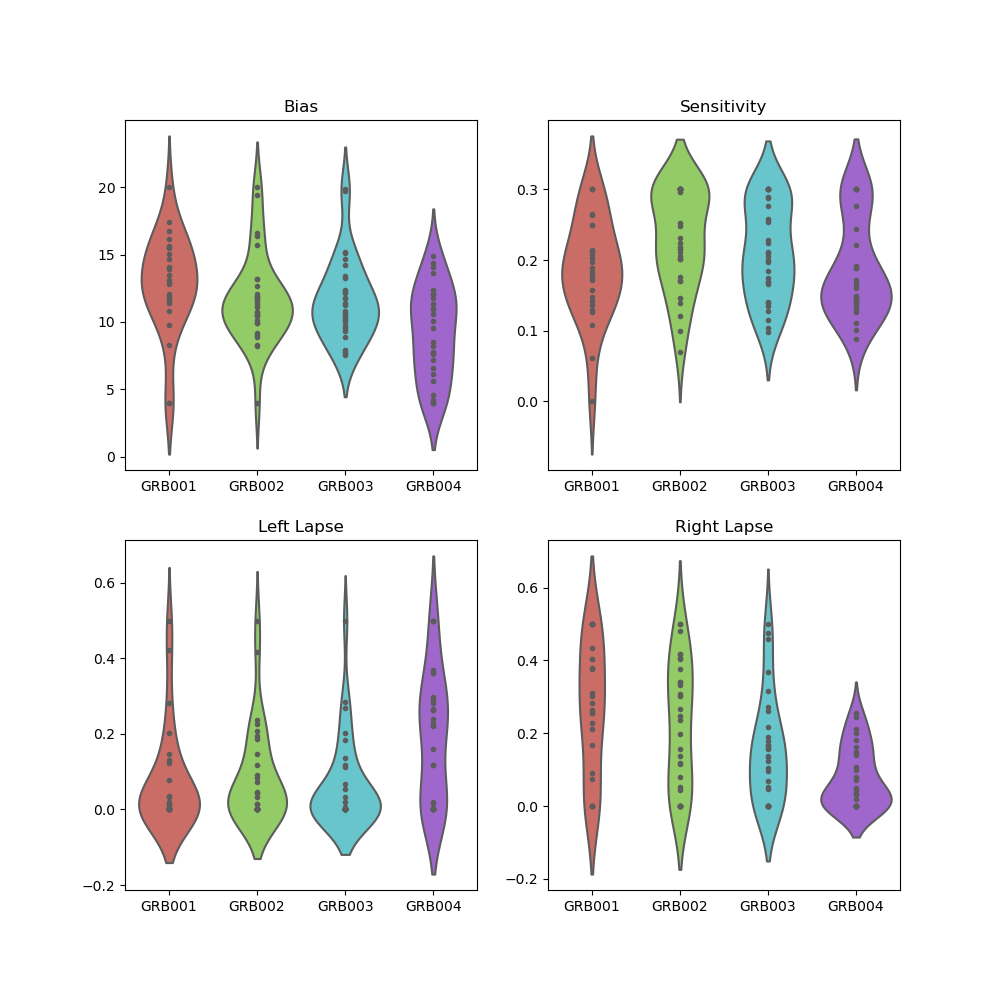

In [34]:
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
colors = sns.color_palette("hls", 4)

# Plot bias
bias_GRB001 = np.array(GRB001_params['bias'])
bias_GRB002 = np.array(GRB002_params['bias'])
bias_GRB003 = np.array(GRB003_params['bias'])
bias_GRB004 = np.array(GRB004_params['bias'])

bias_data = [bias_GRB001[~np.isnan(bias_GRB001)],
             bias_GRB002[~np.isnan(bias_GRB002)],
             bias_GRB003[~np.isnan(bias_GRB003)],
             bias_GRB004[~np.isnan(bias_GRB004)]]

sns.violinplot(ax=axs[0, 0], data=bias_data, inner='point', palette=colors)
axs[0, 0].set_title('Bias')
axs[0, 0].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

# Plot sensitivity
sensitivity_GRB001 = np.array(GRB001_params['sensitivity'])
sensitivity_GRB002 = np.array(GRB002_params['sensitivity'])
sensitivity_GRB003 = np.array(GRB003_params['sensitivity'])
sensitivity_GRB004 = np.array(GRB004_params['sensitivity'])

sensitivity_data = [sensitivity_GRB001[~np.isnan(sensitivity_GRB001)],
                    sensitivity_GRB002[~np.isnan(sensitivity_GRB002)],
                    sensitivity_GRB003[~np.isnan(sensitivity_GRB003)],
                    sensitivity_GRB004[~np.isnan(sensitivity_GRB004)]]

sns.violinplot(ax=axs[0, 1], data=sensitivity_data, inner='point', palette=colors)
axs[0, 1].set_title('Sensitivity')
axs[0, 1].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

# Plot left lapse
left_lapse_GRB001 = np.array(GRB001_params['left_lapse'])
left_lapse_GRB002 = np.array(GRB002_params['left_lapse'])
left_lapse_GRB003 = np.array(GRB003_params['left_lapse'])
left_lapse_GRB004 = np.array(GRB004_params['left_lapse'])

left_lapse_data = [left_lapse_GRB001[~np.isnan(left_lapse_GRB001)],
                   left_lapse_GRB002[~np.isnan(left_lapse_GRB002)],
                   left_lapse_GRB003[~np.isnan(left_lapse_GRB003)],
                   left_lapse_GRB004[~np.isnan(left_lapse_GRB004)]]

sns.violinplot(ax=axs[1, 0], data=left_lapse_data, inner='point', palette=colors)
axs[1, 0].set_title('Left Lapse')
axs[1, 0].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

# Plot right lapse
right_lapse_GRB001 = np.array(GRB001_params['right_lapse'])
right_lapse_GRB002 = np.array(GRB002_params['right_lapse'])
right_lapse_GRB003 = np.array(GRB003_params['right_lapse'])
right_lapse_GRB004 = np.array(GRB004_params['right_lapse'])

right_lapse_data = [right_lapse_GRB001[~np.isnan(right_lapse_GRB001)],
                    right_lapse_GRB002[~np.isnan(right_lapse_GRB002)],
                    right_lapse_GRB003[~np.isnan(right_lapse_GRB003)],
                    right_lapse_GRB004[~np.isnan(right_lapse_GRB004)]]

sns.violinplot(ax=axs[1, 1], data=right_lapse_data, inner='point', palette=colors)
axs[1, 1].set_title('Right Lapse')
axs[1, 1].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

plt.show()

### Rainplots with PMF parameters

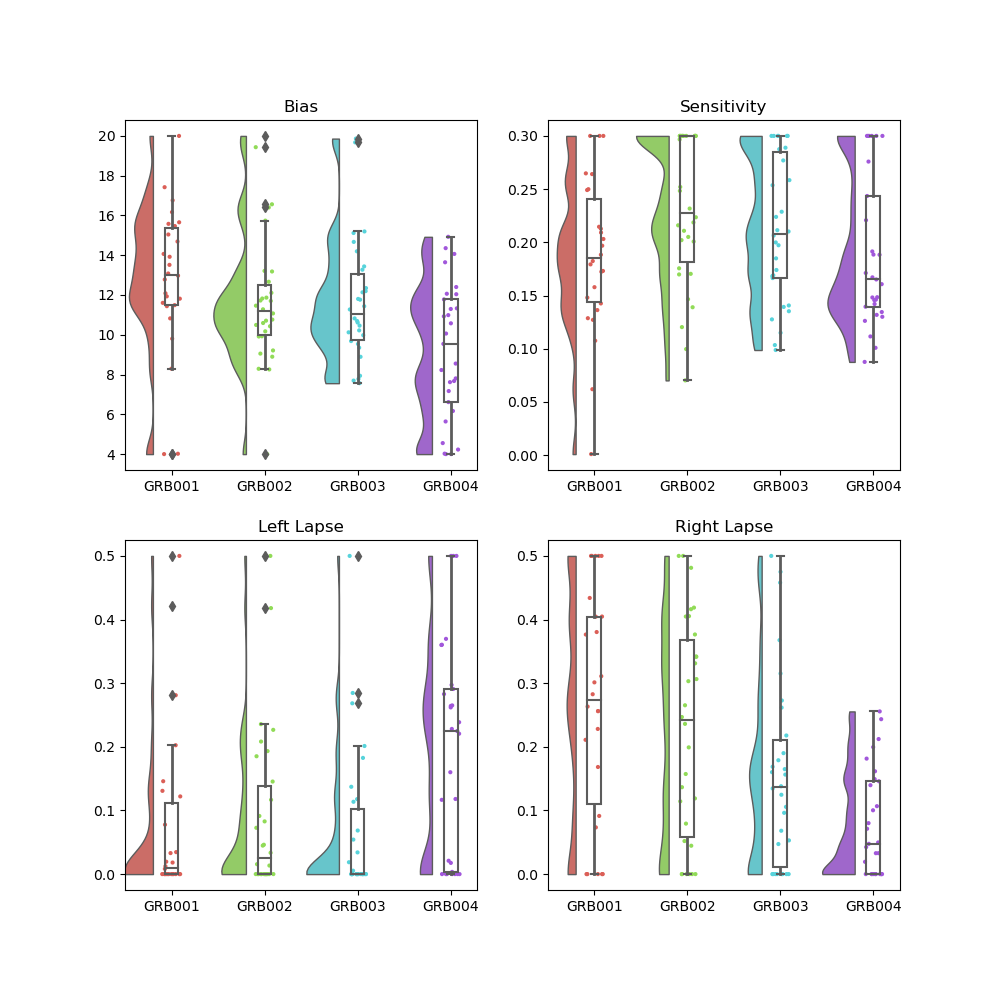

In [5]:
import seaborn as sns
import ptitprince as pt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
colors = sns.color_palette("hls", 4)

# Plot bias
bias_GRB001 = np.array(GRB001_params['bias'])
bias_GRB002 = np.array(GRB002_params['bias'])
bias_GRB003 = np.array(GRB003_params['bias'])
bias_GRB004 = np.array(GRB004_params['bias'])

bias_data = [bias_GRB001[~np.isnan(bias_GRB001)],
             bias_GRB002[~np.isnan(bias_GRB002)],
             bias_GRB003[~np.isnan(bias_GRB003)],
             bias_GRB004[~np.isnan(bias_GRB004)]]

pt.RainCloud(ax=axs[0, 0], data=bias_data,  palette=colors)

axs[0, 0].set_title('Bias')
axs[0, 0].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

# Plot sensitivity
sensitivity_GRB001 = np.array(GRB001_params['sensitivity'])
sensitivity_GRB002 = np.array(GRB002_params['sensitivity'])
sensitivity_GRB003 = np.array(GRB003_params['sensitivity'])
sensitivity_GRB004 = np.array(GRB004_params['sensitivity'])

sensitivity_data = [sensitivity_GRB001[~np.isnan(sensitivity_GRB001)],
                    sensitivity_GRB002[~np.isnan(sensitivity_GRB002)],
                    sensitivity_GRB003[~np.isnan(sensitivity_GRB003)],
                    sensitivity_GRB004[~np.isnan(sensitivity_GRB004)]]

pt.RainCloud(ax=axs[0, 1], data=sensitivity_data, palette=colors)
axs[0, 1].set_title('Sensitivity')
axs[0, 1].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

# Plot left lapse
left_lapse_GRB001 = np.array(GRB001_params['left_lapse'])
left_lapse_GRB002 = np.array(GRB002_params['left_lapse'])
left_lapse_GRB003 = np.array(GRB003_params['left_lapse'])
left_lapse_GRB004 = np.array(GRB004_params['left_lapse'])

left_lapse_data = [left_lapse_GRB001[~np.isnan(left_lapse_GRB001)],
                   left_lapse_GRB002[~np.isnan(left_lapse_GRB002)],
                   left_lapse_GRB003[~np.isnan(left_lapse_GRB003)],
                   left_lapse_GRB004[~np.isnan(left_lapse_GRB004)]]

pt.RainCloud(ax=axs[1, 0], data=left_lapse_data, palette=colors)
axs[1, 0].set_title('Left Lapse')
axs[1, 0].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

# Plot right lapse
right_lapse_GRB001 = np.array(GRB001_params['right_lapse'])
right_lapse_GRB002 = np.array(GRB002_params['right_lapse'])
right_lapse_GRB003 = np.array(GRB003_params['right_lapse'])
right_lapse_GRB004 = np.array(GRB004_params['right_lapse'])

right_lapse_data = [right_lapse_GRB001[~np.isnan(right_lapse_GRB001)],
                    right_lapse_GRB002[~np.isnan(right_lapse_GRB002)],
                    right_lapse_GRB003[~np.isnan(right_lapse_GRB003)],
                    right_lapse_GRB004[~np.isnan(right_lapse_GRB004)]]

pt.RainCloud(ax=axs[1, 1], data=right_lapse_data, palette=colors)
axs[1, 1].set_title('Right Lapse')
axs[1, 1].set_xticklabels(['GRB001', 'GRB002', 'GRB003', 'GRB004'])

plt.show()

### Kdeplot colored by sex

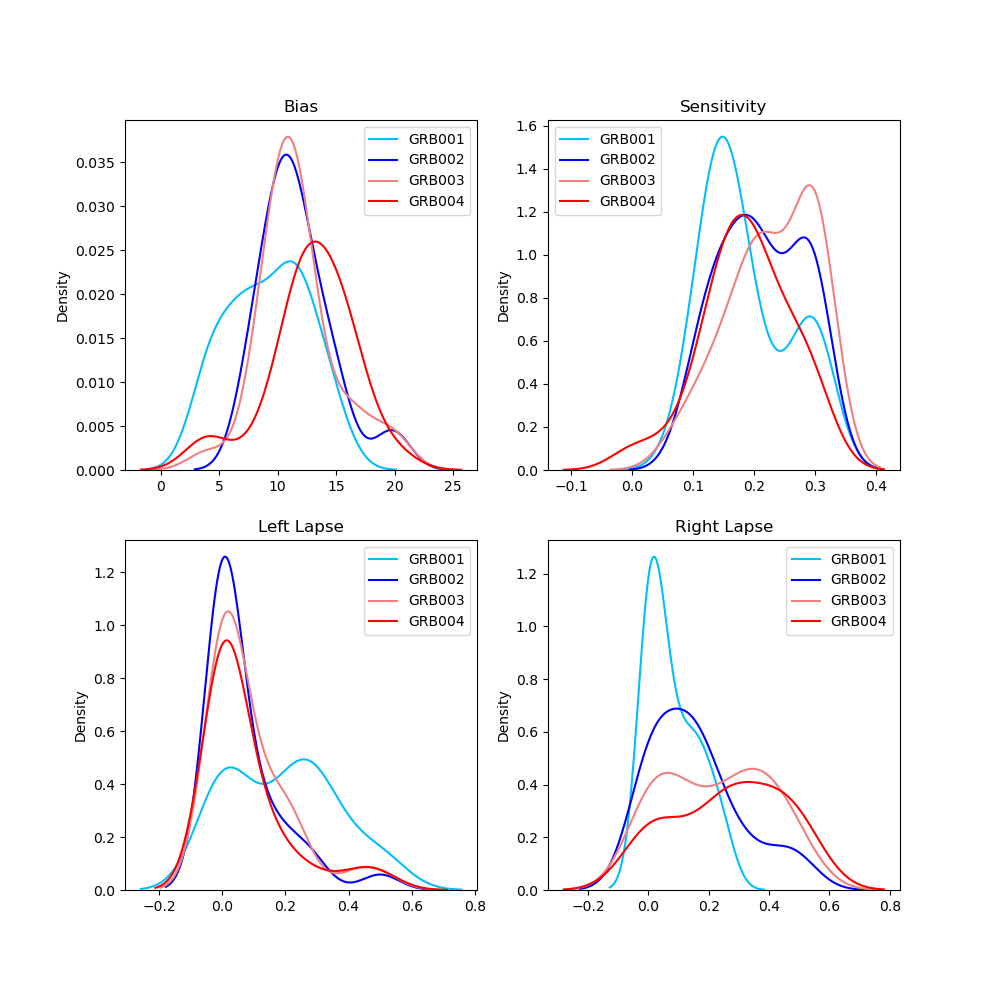

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
colors= ['r', 'lightcoral', 'b', 'deepskyblue']
labels = ['GRB001', 'GRB002', 'GRB003', 'GRB004']

# Plot bias
bias_GRB001 = np.array(GRB001_params['bias'])
bias_GRB002 = np.array(GRB002_params['bias'])
bias_GRB003 = np.array(GRB003_params['bias'])
bias_GRB004 = np.array(GRB004_params['bias'])

bias_data = [bias_GRB001[~np.isnan(bias_GRB001)],
             bias_GRB002[~np.isnan(bias_GRB002)],
             bias_GRB003[~np.isnan(bias_GRB003)],
             bias_GRB004[~np.isnan(bias_GRB004)]]

sns.kdeplot(ax=axs[0, 0], data=bias_data, palette=colors, fill=False)
# axs[0, 0].set_ylim([0,1.7])
axs[0, 0].set_title('Bias')
axs[0, 0].legend(labels)

# Plot sensitivity
sensitivity_GRB001 = np.array(GRB001_params['sensitivity'])
sensitivity_GRB002 = np.array(GRB002_params['sensitivity'])
sensitivity_GRB003 = np.array(GRB003_params['sensitivity'])
sensitivity_GRB004 = np.array(GRB004_params['sensitivity'])

sensitivity_data = [sensitivity_GRB001[~np.isnan(sensitivity_GRB001)],
                    sensitivity_GRB002[~np.isnan(sensitivity_GRB002)],
                    sensitivity_GRB003[~np.isnan(sensitivity_GRB003)],
                    sensitivity_GRB004[~np.isnan(sensitivity_GRB004)]]

sns.kdeplot(ax=axs[0, 1], data=sensitivity_data, palette=colors, fill=False)
# axs[0, 1].set_ylim([0,1.7])
axs[0, 1].set_title('Sensitivity')
axs[0, 1].legend(labels)

# Plot left lapse
left_lapse_GRB001 = np.array(GRB001_params['left_lapse'])
left_lapse_GRB002 = np.array(GRB002_params['left_lapse'])
left_lapse_GRB003 = np.array(GRB003_params['left_lapse'])
left_lapse_GRB004 = np.array(GRB004_params['left_lapse'])

left_lapse_data = [left_lapse_GRB001[~np.isnan(left_lapse_GRB001)],
                   left_lapse_GRB002[~np.isnan(left_lapse_GRB002)],
                   left_lapse_GRB003[~np.isnan(left_lapse_GRB003)],
                   left_lapse_GRB004[~np.isnan(left_lapse_GRB004)]]

sns.kdeplot(ax=axs[1, 0], data=left_lapse_data, palette=colors, fill=False)
# axs[1, 0].set_ylim([0,1.7])
axs[1, 0].set_title('Left Lapse')
axs[1, 0].legend(labels)

# Plot right lapse
right_lapse_GRB001 = np.array(GRB001_params['right_lapse'])
right_lapse_GRB002 = np.array(GRB002_params['right_lapse'])
right_lapse_GRB003 = np.array(GRB003_params['right_lapse'])
right_lapse_GRB004 = np.array(GRB004_params['right_lapse'])

right_lapse_data = [right_lapse_GRB001[~np.isnan(right_lapse_GRB001)],
                    right_lapse_GRB002[~np.isnan(right_lapse_GRB002)],
                    right_lapse_GRB003[~np.isnan(right_lapse_GRB003)],
                    right_lapse_GRB004[~np.isnan(right_lapse_GRB004)]]

sns.kdeplot(ax=axs[1, 1], data=right_lapse_data, palette=colors, fill=False)
# axs[1, 1].set_ylim([0,1.7])
axs[1, 1].set_title('Right Lapse')
axs[1, 1].legend(labels)

plt.show()